In [50]:
# Import
import os
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
# Define Work, Data Directories
Data_dir = 'C:\\Users\\GraceLiu\\Sta141b\\FinalProject'

In [3]:
# Define Import CSV Table Function
def ImportCSVTable(Path):
    import csv
    with open(Path) as f:
        reader = csv.reader(f)
        next(reader) # skip header
        Table = []
        for row in reader:
            Table.append(row)
    return Table

In [7]:
# Define Extract Time Series Function (Takes a long time to complete execution)
def ImportTimeSeries(dataframe, DataDirectory, SearchTerm, csvName):
    import os, glob, csv
    import pandas as pd
    import logging
    # set up logging to file
    logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
                    datefmt='%m-%d %H:%M',
                    filename= os.path.join(DataDirectory,csvName+'.log'),
                    filemode='w')
    # define a Handler which writes INFO messages or higher to the sys.stderr
    console = logging.StreamHandler()
    console.setLevel(logging.INFO)
    # set a format which is simpler for console use
    formatter = logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s')
    # tell the handler to use this format
    console.setFormatter(formatter)
    # add the handler to the root logger
    logging.getLogger('').addHandler(console)
    
    from subprocess import Popen, PIPE
    count = 0
    list1 = []
    for index, row in SiteTable.iterrows():
        print(row)
        Region = row['Region']
        SiteName = row['SiteName']
        Lat = str(row['Lat'])
        Lon = str(row['Lon'])
        if csvName == "Prcp" or csvName == "Tave":
            if Region == "HREC":
                Input_Path = os.path.join(DataDirectory,'DayMet',csvName,"11549",SearchTerm)
            elif Region == "SLO":
                Input_Path = os.path.join(DataDirectory,'DayMet',csvName,"11190",SearchTerm)
            elif Region == "SFREC":
                Input_Path = os.path.join(DataDirectory,'DayMet',csvName,"11550",SearchTerm)
            else:
                Input_Path = os.path.join(DataDirectory,'DayMet',csvName,'**',SearchTerm)
        elif csvName == "Landsat_NDVI" or csvName == "MODIS_NDVI" or csvName == "SSTARFM_NDVI":
            Input_Path = os.path.join(DataDirectory,Region,'**',SearchTerm)
        else:
            Input_Path = os.path.join(DataDirectory,'**',SearchTerm)
        # Input_Path = os.path.join(DataDirectory,'**',SearchTerm)

        print(Input_Path)
        for rastersource in glob.iglob(Input_Path, recursive=True):
            cmd = ['gdallocationinfo', '-geoloc', '-valonly', '-wgs84', rastersource, Lon, Lat]
            p = Popen(cmd, stdout=PIPE)
            p.wait()
            val = p.stdout.read()
            # print(cmd)
            # print(val)
            try:
                float(val)
                count += 1
                logging.info('found ' + SearchTerm + ' for row '+str(count))
                rasterfilename = os.path.basename(rastersource)
                row = [rasterfilename, Region, SiteName, str(float(val))]
                logging.info(row)
                list1.append(row)
                # print(row)
            except:
                continue   
    csvfile = os.path.join(DataDirectory, csvName+'.csv')
    TimeSeries = pd.DataFrame(list1, columns=['Raster', 'Region', 'SiteName', csvName])
    print(TimeSeries)
    TimeSeries.to_csv(csvfile)
    print('Import '+SearchTerm+' Time Series Completed')

In [8]:
# Import Biomass Summary Table, clean up data to extract a list of coordinates
BiomassTablePath = os.path.join(Data_dir,'Biomass_summary.csv')
BiomassTable = ImportCSVTable(BiomassTablePath)
PDBiomassTable = pd.DataFrame(BiomassTable, columns=['ID', 'Region', 'SiteName', 'Biomass', 'Date', 'Lat', 'Lon'])
PDBiomassTable.drop(['ID','Biomass','Date'], inplace=True, axis=1)
PDBiomassTable = PDBiomassTable.drop_duplicates(keep='first')
PDBiomassTable['Lat'] = PDBiomassTable['Lat'].astype(float)
PDBiomassTable['Lon'] = PDBiomassTable['Lon'].astype(float)
PDBiomassTable

,Region,SiteName,Lat,Lon
0,HREC,Lambing_F,39.004936,-123.081346
1,HREC,Lambing_F,39.004936,-123.080992
2,HREC,Lambing_F,39.004681,-123.081346
3,HREC,Lambing_F,39.004678,-123.080991
4,HREC,Lambing_G,39.004565,-123.081882
78,SFREC,Koch,39.295817,-121.290492
86,SFREC,Forbes,39.232298,-121.297144
94,SFREC,Porter,39.256857,-121.331499
102,SLO,ShellCreek,35.521838,-120.350670
103,SLO,ShellCreek,35.521865,-120.350374


In [9]:
# Keep Lambing_F, all SFREC data 
KeepSitesFilter = PDBiomassTable['Region'].str.contains('SFREC')
SiteTable = PDBiomassTable.loc[KeepSitesFilter]

# Summarize Camatta sites into a single Lat Lon
Filter = PDBiomassTable['SiteName'].str.contains('Camatta') | PDBiomassTable['SiteName'].str.contains('camatta')
Table = PDBiomassTable.loc[Filter]
summary = [['SLO','Camatta', Table['Lat'].mean(), Table['Lon'].mean()]]
df2 = pd.DataFrame(summary, columns=['Region', 'SiteName', 'Lat', 'Lon'])
SiteTable = SiteTable.append(df2, ignore_index=True)

# Summarize ShellCreek sites into a single Lat Lon
Filter = PDBiomassTable['SiteName'].str.contains('ShellCreek')
Table = PDBiomassTable.loc[Filter]
summary = [['SLO','ShellCreek', Table['Lat'].mean(), Table['Lon'].mean()]]
df2 = pd.DataFrame(summary, columns=['Region', 'SiteName', 'Lat', 'Lon'])
SiteTable = SiteTable.append(df2, ignore_index=True)

# Summarize Lambing_F sites into a single Lat Lon
Filter = PDBiomassTable['SiteName'].str.contains('Lambing_F')
Table = PDBiomassTable.loc[Filter]
summary = [['HREC','Lambing', Table['Lat'].mean(), Table['Lon'].mean()]]
df2 = pd.DataFrame(summary, columns=['Region', 'SiteName', 'Lat', 'Lon'])
SiteTable = SiteTable.append(df2, ignore_index=True)
print(SiteTable)

# Export to csv
SiteTable.to_csv(os.path.join(Data_dir ,'SiteTable.csv'))

  Region    SiteName        Lat         Lon
0  SFREC        Koch  39.295817 -121.290492
1  SFREC      Forbes  39.232298 -121.297144
2  SFREC      Porter  39.256857 -121.331499
3    SLO     Camatta  35.497440 -120.302285
4    SLO  ShellCreek  35.521738 -120.350538
5   HREC     Lambing  39.004808 -123.081169


In [10]:
# Extract Time Series (Takes a long time to complete execution)
# ImportTimeSeries(SiteTable, Data_dir, "prcp_*.tif", "Prcp")
# ImportTimeSeries(SiteTable, Data_dir, "tave_*.tif", "Tave")
# ImportTimeSeries(SiteTable, Data_dir, "*_sr_ndvi_cleaned.tif", "Landsat_NDVI")
# ImportTimeSeries(SiteTable, Data_dir, "MIX09GQ_*_ndvi.tiff", "MODIS_NDVI")
# ImportTimeSeries(SiteTable, Data_dir, "SSTARFM_*_NDVI.tif", "SSTARFM_NDVI")
# ImportTimeSeries(SiteTable, Data_dir, "*slo.tif", "Slope")
# ImportTimeSeries(SiteTable, Data_dir, "*asp.tif", "Aspect")
# ImportTimeSeries(SiteTable, Data_dir, "*ic.tif", "IC")
# ImportTimeSeries(SiteTable, Data_dir, "*v3.tif", "Elevation")


In [11]:
# Import Time Series csv from previous step
Variables = ['Landsat_NDVI', 'MODIS_NDVI', 'SSTARFM_NDVI', 'Prcp', 'Tave']
# Setup empty table
JoinedTable = pd.DataFrame({'?' : []})

for variable in Variables:
    TablePath = os.path.join(Data_dir,variable+'.csv')
    TableInList = ImportCSVTable(TablePath)
    VarPdTable = pd.DataFrame(TableInList, columns=['ID', 'Raster', 'Region', 'SiteName', variable])
    # print(VarPdTable)
    # Extract Dates based on naming format of Raster
    RasterNameSplit = VarPdTable['Raster'].str.split("_", expand=True)
    # print(RasterNameSplit[1])
    if variable== 'Landsat_NDVI':
        date = pd.to_datetime(RasterNameSplit[3])
    elif variable== 'MODIS_NDVI':
        date = pd.to_datetime(RasterNameSplit[1],format = '%Y%j')
    elif variable == 'SSTARFM_NDVI':
        date = pd.to_datetime(RasterNameSplit[2])
    elif variable == 'Prcp' or variable == 'Tave':
        RasterNameSplit2 = RasterNameSplit[1].str.split(".", expand=True)
        # print(RasterNameSplit2[0])
        date = pd.to_datetime(RasterNameSplit2[0])
    # print(date)
    VarPdTable['Date'] = date
    VarPdTable.drop(['ID', 'Raster'], inplace=True, axis=1)
    # print(VarPdTable)
    # Join Tables
    if JoinedTable.empty:
        JoinedTable = VarPdTable
    else:
        JoinedTable = pd.merge(JoinedTable, VarPdTable, how='outer', on=['Region', 'SiteName','Date'],
                               sort=True, copy=True, indicator=False,
                               validate=None)
        
# Rearrange columns of JoinedTable
JoinedTable = JoinedTable[['Region','SiteName','Date','Landsat_NDVI','MODIS_NDVI','SSTARFM_NDVI','Prcp','Tave']]
# Ensure data are float
for variable in Variables:
    JoinedTable[variable] = JoinedTable[variable].astype(float)
print(JoinedTable)
# Export to csv
JoinedTable.to_csv(os.path.join(Data_dir ,'JoinedTable.csv'))

      Region    SiteName       Date  Landsat_NDVI  MODIS_NDVI  SSTARFM_NDVI  \
0       HREC     Lambing 2013-01-01           NaN         NaN           NaN   
1       HREC     Lambing 2013-01-02           NaN         NaN           NaN   
2       HREC     Lambing 2013-01-03           NaN         NaN           NaN   
3       HREC     Lambing 2013-01-04           NaN         NaN           NaN   
4       HREC     Lambing 2013-01-05           NaN         NaN           NaN   
5       HREC     Lambing 2013-01-06           NaN         NaN           NaN   
6       HREC     Lambing 2013-01-07           NaN         NaN           NaN   
7       HREC     Lambing 2013-01-08           NaN         NaN           NaN   
8       HREC     Lambing 2013-01-09           NaN         NaN           NaN   
9       HREC     Lambing 2013-01-10           NaN         NaN           NaN   
10      HREC     Lambing 2013-01-11           NaN         NaN           NaN   
11      HREC     Lambing 2013-01-12           NaN   

Region        SFREC
SiteName       Koch
Lat         39.2958
Lon         -121.29
Name: 0, dtype: object


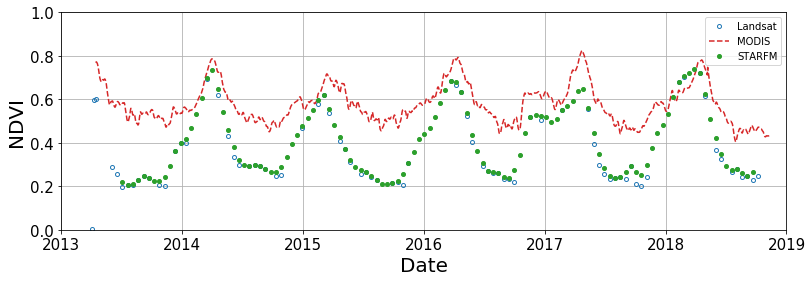

Region        SFREC
SiteName     Forbes
Lat         39.2323
Lon        -121.297
Name: 1, dtype: object


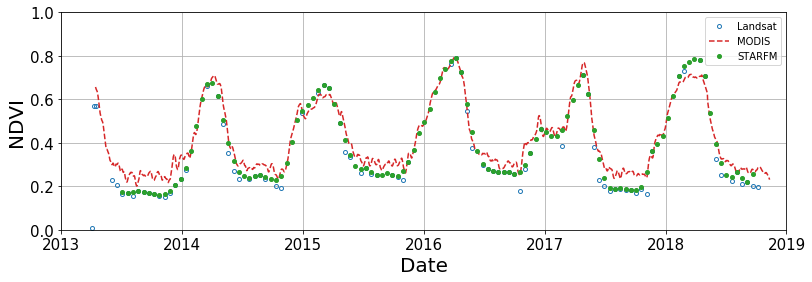

Region        SFREC
SiteName     Porter
Lat         39.2569
Lon        -121.331
Name: 2, dtype: object


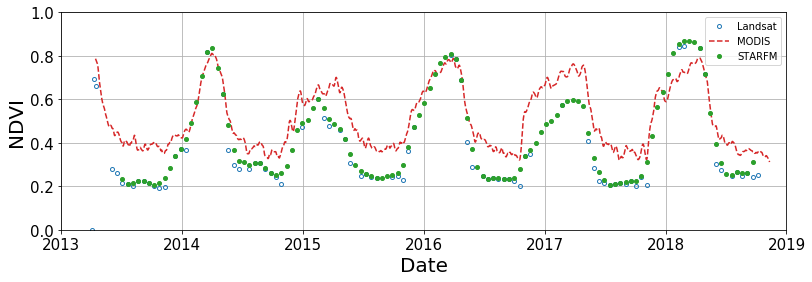

Region          SLO
SiteName    Camatta
Lat         35.4974
Lon        -120.302
Name: 3, dtype: object


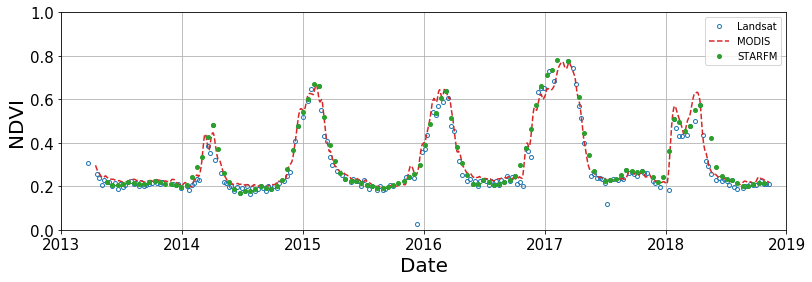

Region             SLO
SiteName    ShellCreek
Lat            35.5217
Lon           -120.351
Name: 4, dtype: object


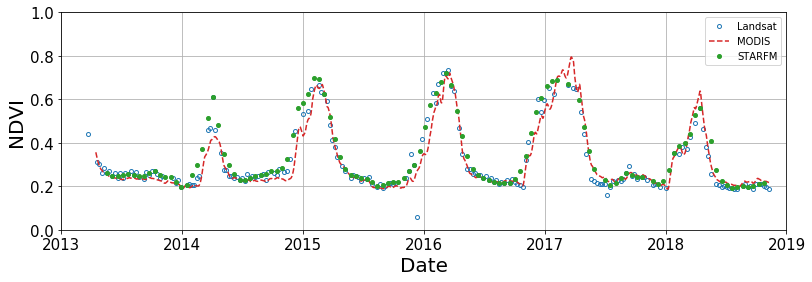

Region         HREC
SiteName    Lambing
Lat         39.0048
Lon        -123.081
Name: 5, dtype: object


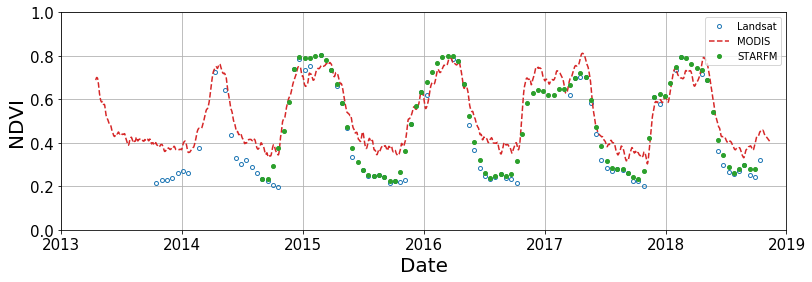

In [16]:
# Plot time series of NDVI from three sources for each site
figNum=0
for index, row in SiteTable.iterrows():
    print(row)
    Region = row['Region']
    SiteName = row['SiteName']
    
    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset)
    figNum+=1
    plt.figure(figNum, figsize=(13,4))        
    plt.plot(JoinedTableSubset['Date'], JoinedTableSubset['Landsat_NDVI'],'o',fillstyle='none', markersize=4, color = 'tab:blue', label="Landsat")    
    plt.plot(JoinedTableSubset['Date'], JoinedTableSubset['MODIS_NDVI'],'--', color = 'tab:red', label="MODIS")    
    plt.plot(JoinedTableSubset['Date'], JoinedTableSubset['SSTARFM_NDVI'],'o',fillstyle='full', markersize=4, color = 'tab:green', label="STARFM")
    plt.xlim(datetime.strptime('20130101','%Y%m%d'), datetime.strptime('20190101','%Y%m%d'))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.ylabel('NDVI',fontsize = 20)
    plt.xlabel('Date',fontsize = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.legend(prop = {'size':10},loc = 'upper right')
    plt.show()
    #plt.savefig("C://Users//JIN Lab//Desktop//Datafuion_"+SiteName+".png",dpi = 300,bbox_inches = 'tight')

Precipitation (mm/day)
Region        SFREC
SiteName       Koch
Lat         39.2958
Lon         -121.29
Name: 0, dtype: object


<Figure size 432x288 with 0 Axes>

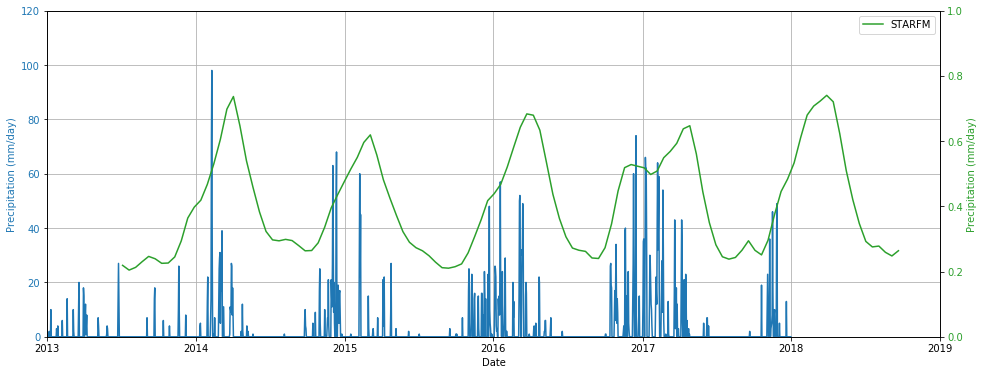

Average Temperature (Celcius)
Region        SFREC
SiteName       Koch
Lat         39.2958
Lon         -121.29
Name: 0, dtype: object


<Figure size 432x288 with 0 Axes>

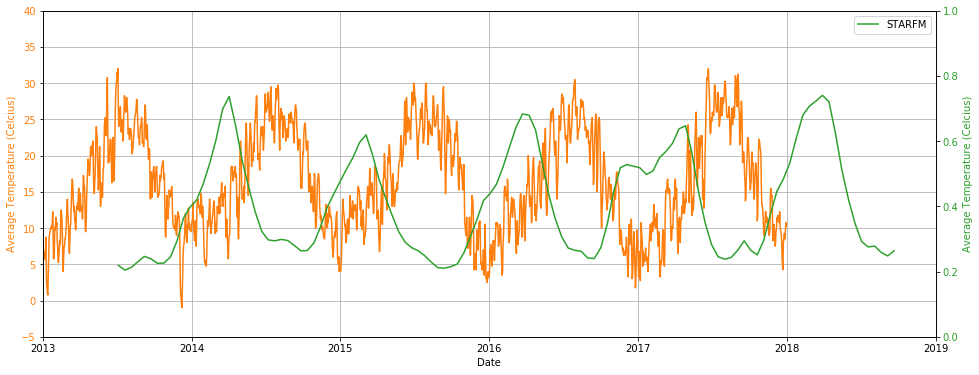

Precipitation (mm/day)
Region        SFREC
SiteName     Forbes
Lat         39.2323
Lon        -121.297
Name: 1, dtype: object


<Figure size 432x288 with 0 Axes>

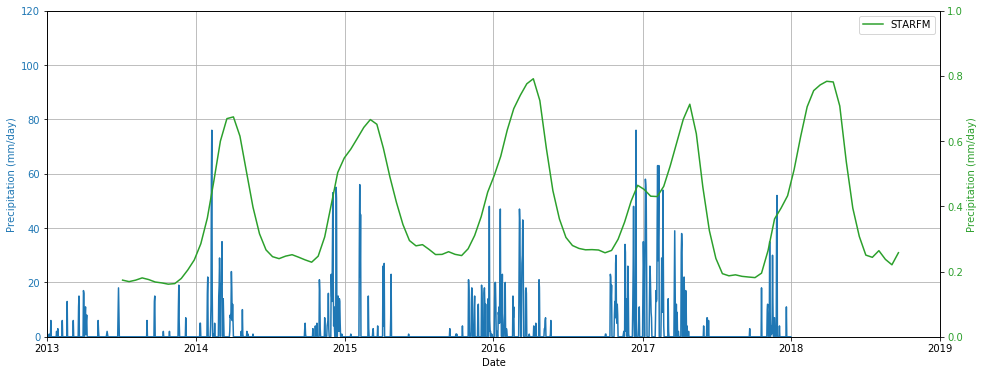

Average Temperature (Celcius)
Region        SFREC
SiteName     Forbes
Lat         39.2323
Lon        -121.297
Name: 1, dtype: object


<Figure size 432x288 with 0 Axes>

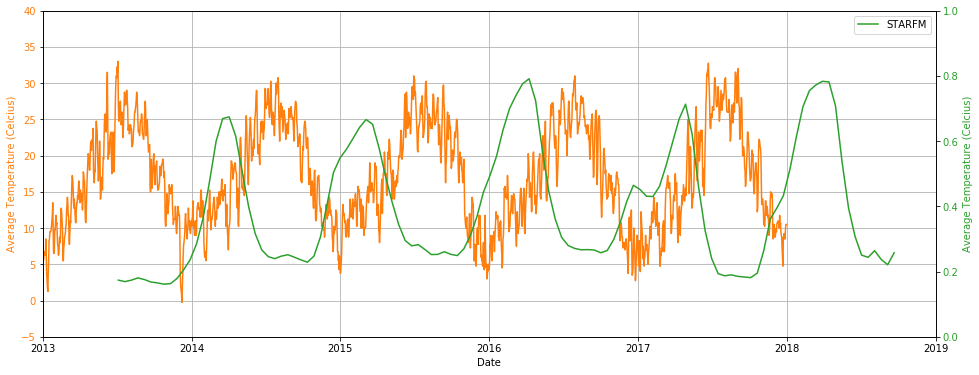

Precipitation (mm/day)
Region        SFREC
SiteName     Porter
Lat         39.2569
Lon        -121.331
Name: 2, dtype: object


<Figure size 432x288 with 0 Axes>

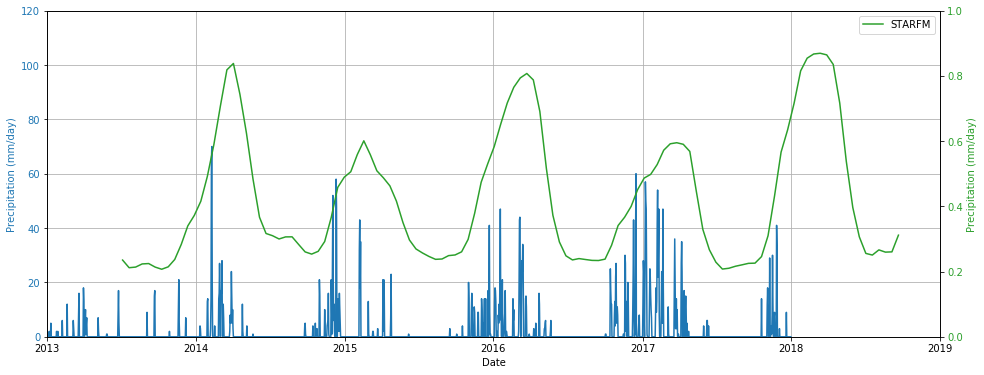

Average Temperature (Celcius)
Region        SFREC
SiteName     Porter
Lat         39.2569
Lon        -121.331
Name: 2, dtype: object


<Figure size 432x288 with 0 Axes>

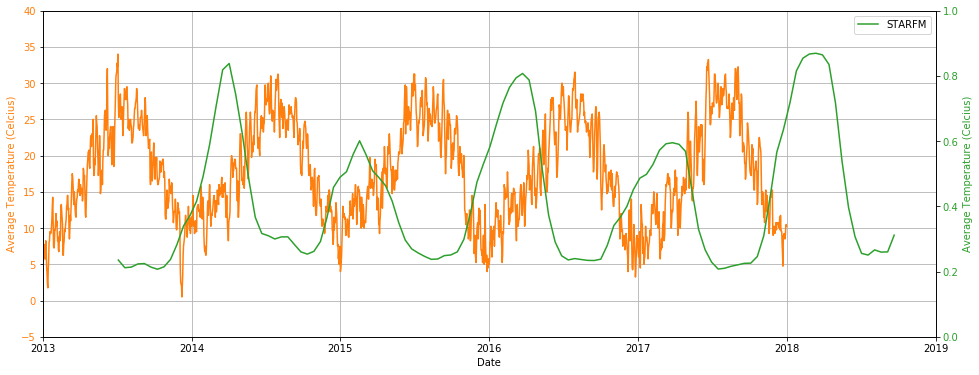

Precipitation (mm/day)
Region          SLO
SiteName    Camatta
Lat         35.4974
Lon        -120.302
Name: 3, dtype: object


<Figure size 432x288 with 0 Axes>

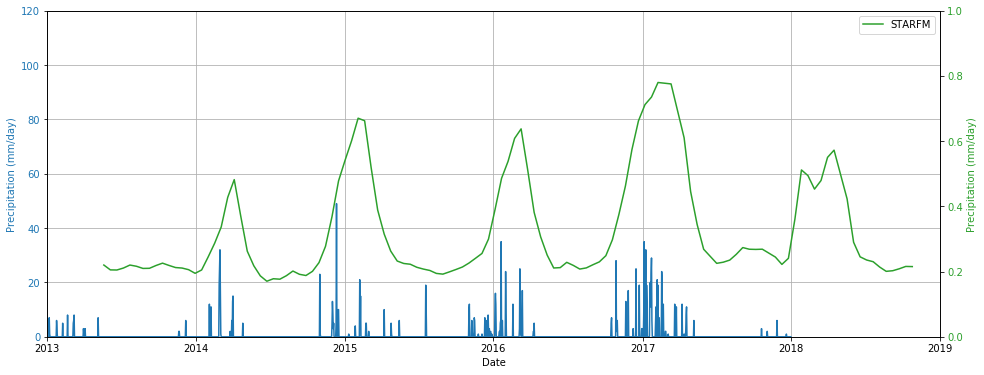

Average Temperature (Celcius)
Region          SLO
SiteName    Camatta
Lat         35.4974
Lon        -120.302
Name: 3, dtype: object


<Figure size 432x288 with 0 Axes>

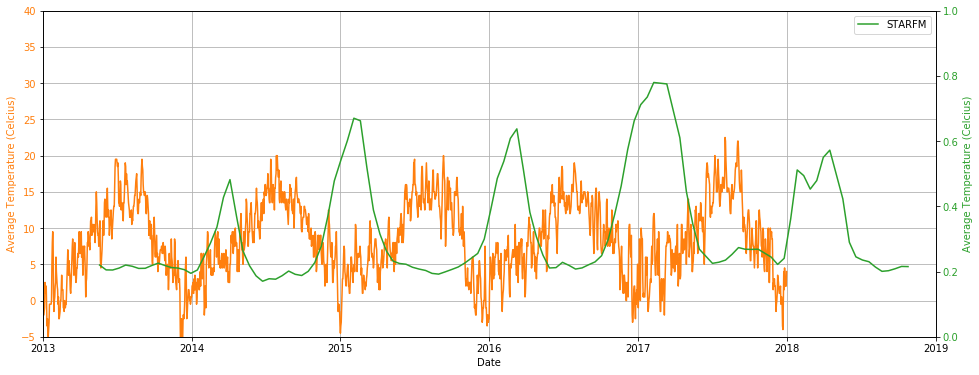

Precipitation (mm/day)
Region             SLO
SiteName    ShellCreek
Lat            35.5217
Lon           -120.351
Name: 4, dtype: object


<Figure size 432x288 with 0 Axes>

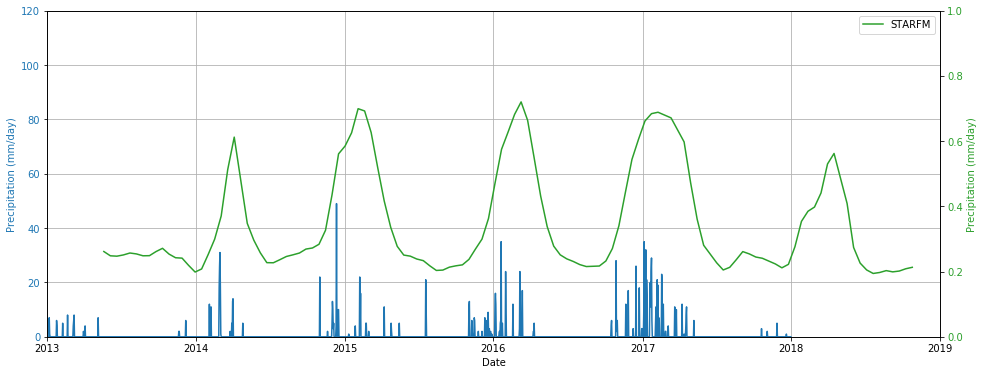

Average Temperature (Celcius)
Region             SLO
SiteName    ShellCreek
Lat            35.5217
Lon           -120.351
Name: 4, dtype: object


<Figure size 432x288 with 0 Axes>

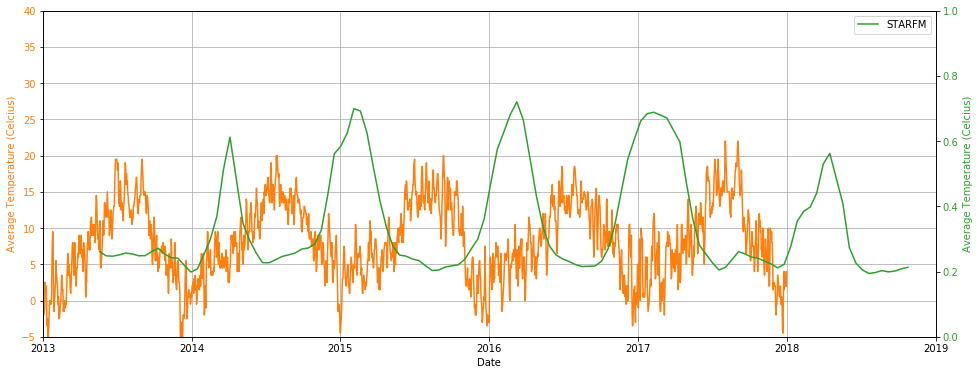

Precipitation (mm/day)
Region         HREC
SiteName    Lambing
Lat         39.0048
Lon        -123.081
Name: 5, dtype: object


<Figure size 432x288 with 0 Axes>

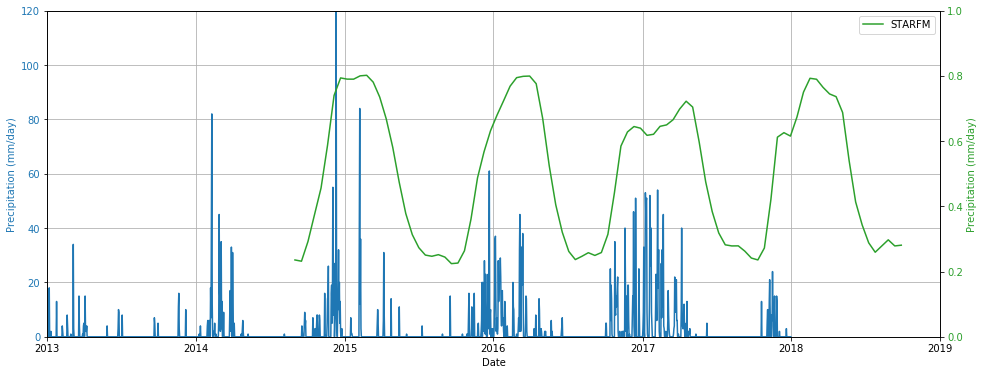

Average Temperature (Celcius)
Region         HREC
SiteName    Lambing
Lat         39.0048
Lon        -123.081
Name: 5, dtype: object


<Figure size 432x288 with 0 Axes>

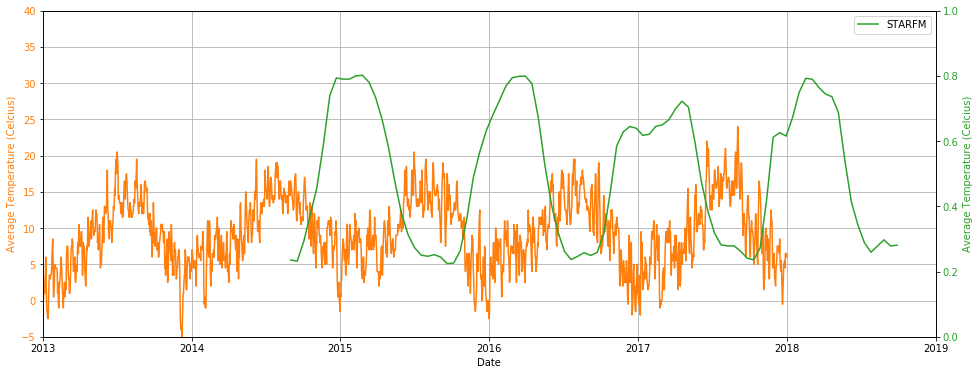

In [10]:
# Plot time series of NDVI from MODIS, STARFM with each of the weather variable for each site
figNum=0
WeatherVariables = ['Prcp','Tave']
WeatherLabels = ['Precipitation (mm/day)','Average Temperature (Celcius)']
WeatherColors = ['tab:blue','tab:orange']
Weathertopylims = [120, 40]
Weatherbomylims = [0, -5]
for index, row in SiteTable.iterrows():
    for wi in range(len(WeatherVariables)):
        WeatherVariable = WeatherVariables[wi]
        WeatherLabel = WeatherLabels[wi]
        Weathertopylim = Weathertopylims[wi]
        Weatherbomylim = Weatherbomylims[wi]
        WeatherColor = WeatherColors[wi]
        print(WeatherLabel)
        print(row)
        Region = row['Region']
        SiteName = row['SiteName']

        Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
        # print(Filter)
        JoinedTableSubset = JoinedTable.loc[Filter]
        # print(JoinedTableSubset)
        STARFMNANFilter = JoinedTableSubset['SSTARFM_NDVI'].notnull()
        JoinedTableSTARFMSubset = JoinedTableSubset.loc[STARFMNANFilter]
        # print(JoinedTableSTARFMSubset)   
        figNum+=1
        plt.figure(figNum)
        fig, ax1 = plt.subplots(figsize=(16,6))
        ax2 = ax1.twinx()
        ax1.plot(JoinedTableSubset['Date'], JoinedTableSubset[WeatherVariable], color = WeatherColor)

        # ax2.plot(JoinedTableSubset['Date'], JoinedTableSubset['MODIS_NDVI'],'--', color = 'tab:red', label="MODIS")
        ax2.plot(JoinedTableSTARFMSubset['Date'], JoinedTableSTARFMSubset['SSTARFM_NDVI'],'-', color = 'tab:green', label="STARFM")
        ax1.set_ylim(Weatherbomylim,Weathertopylim)
        ax2.set_ylim(0, 1)
        ax1.set_xlim(datetime.strptime('20130101','%Y%m%d'), datetime.strptime('20190101','%Y%m%d'))
        ax1.grid(True)
        ax2.set_ylabel('STARFM NDVI')
        ax2.set_ylabel(WeatherLabel, color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')
        ax1.set_ylabel(WeatherLabel, color=WeatherColor)
        ax1.tick_params(axis='y', labelcolor=WeatherColor)
        ax1.set_xlabel('Date')
        ax2.legend()
        plt.show()

Region        SFREC
SiteName       Koch
Lat         39.2958
Lon         -121.29
Name: 0, dtype: object


<Figure size 432x288 with 0 Axes>

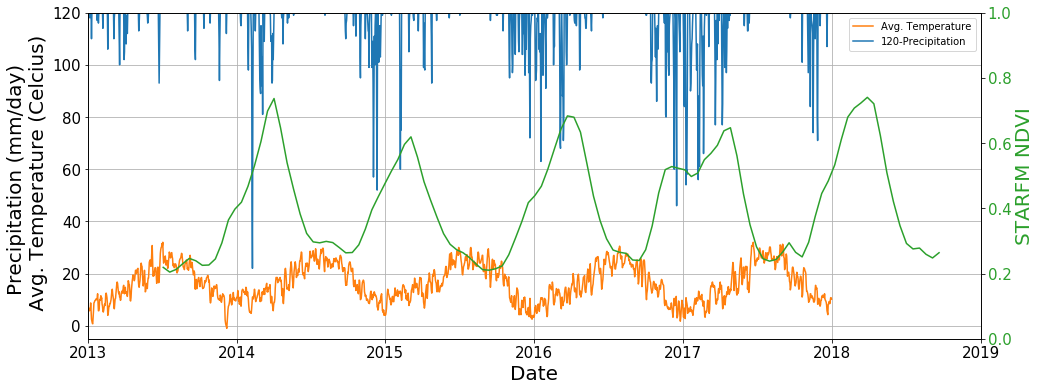

Region        SFREC
SiteName     Forbes
Lat         39.2323
Lon        -121.297
Name: 1, dtype: object


<Figure size 432x288 with 0 Axes>

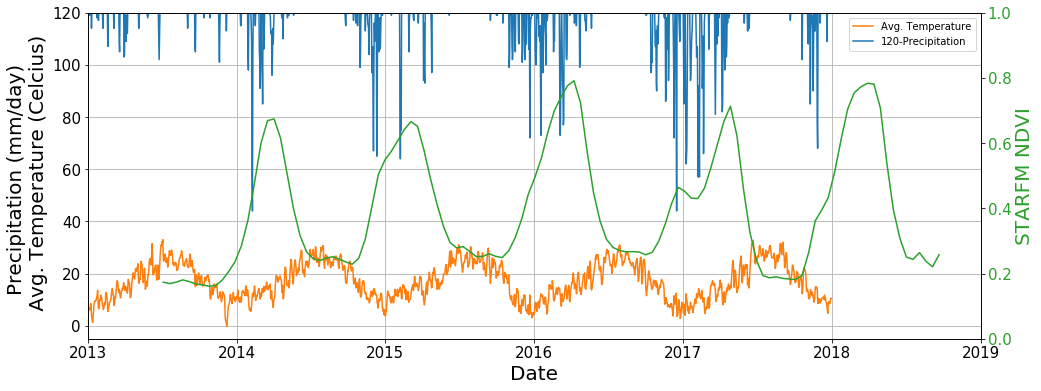

Region        SFREC
SiteName     Porter
Lat         39.2569
Lon        -121.331
Name: 2, dtype: object


<Figure size 432x288 with 0 Axes>

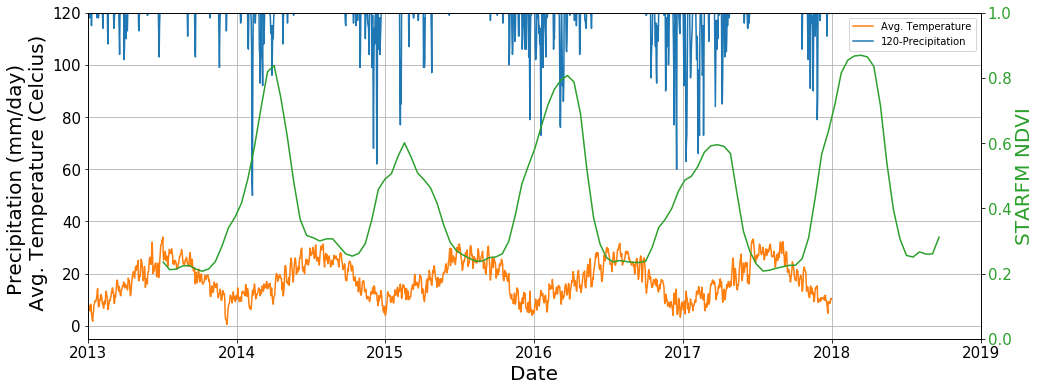

Region          SLO
SiteName    Camatta
Lat         35.4974
Lon        -120.302
Name: 3, dtype: object


<Figure size 432x288 with 0 Axes>

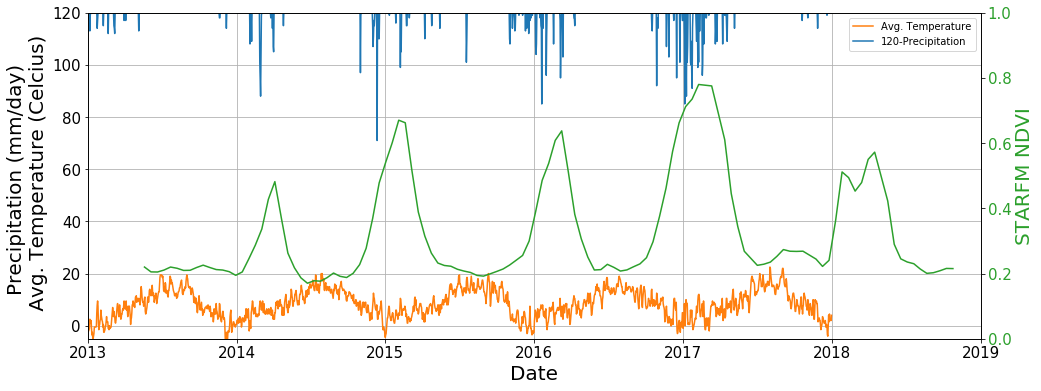

Region             SLO
SiteName    ShellCreek
Lat            35.5217
Lon           -120.351
Name: 4, dtype: object


<Figure size 432x288 with 0 Axes>

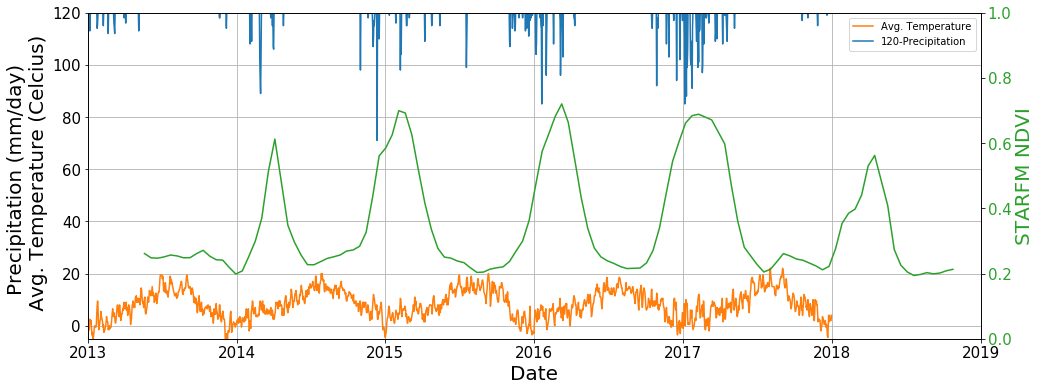

Region         HREC
SiteName    Lambing
Lat         39.0048
Lon        -123.081
Name: 5, dtype: object


<Figure size 432x288 with 0 Axes>

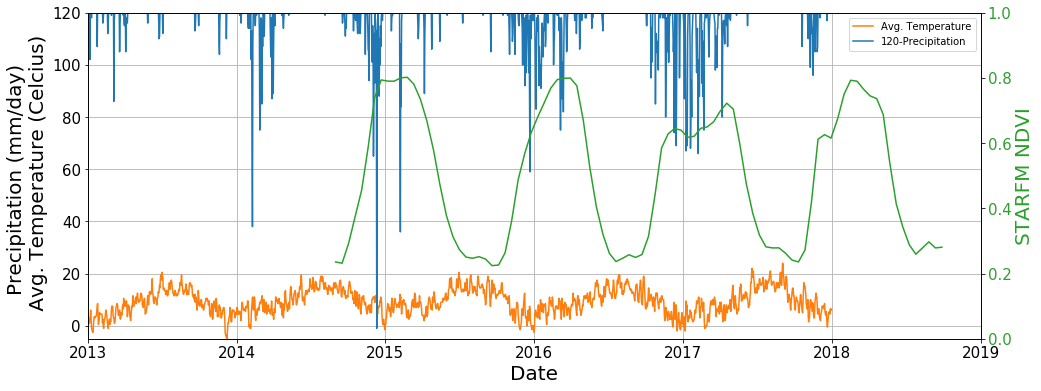

In [13]:
# Plot time series of NDVI from MODIS, STARFM with both of the weather variable in a single plot for each site
figNum=0
for index, row in SiteTable.iterrows():
    print(row)
    Region = row['Region']
    SiteName = row['SiteName']

    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset)
    STARFMNANFilter = JoinedTableSubset['SSTARFM_NDVI'].notnull()
    JoinedTableSTARFMSubset = JoinedTableSubset.loc[STARFMNANFilter]
    # print(JoinedTableSTARFMSubset)   
    figNum+=1
    plt.figure(figNum)
    fig, ax1 = plt.subplots(figsize=(16,6))
    ax2 = ax1.twinx()
    ax1.plot(JoinedTableSubset['Date'], JoinedTableSubset['Tave'], color = 'tab:orange', label="Avg. Temperature")
    ax1.plot(JoinedTableSubset['Date'], 120-(JoinedTableSubset['Prcp']), color = 'tab:blue', label="120-Precipitation")

    # ax2.plot(JoinedTableSubset['Date'], JoinedTableSubset['MODIS_NDVI'],'--', color = 'tab:red', label="MODIS")
    ax2.plot(JoinedTableSTARFMSubset['Date'], JoinedTableSTARFMSubset['SSTARFM_NDVI'],'-', color = 'tab:green', label="STARFM")
    ax1.set_xlim(datetime.strptime('20130101','%Y%m%d'), datetime.strptime('20190101','%Y%m%d'))
    ax1.set_ylim(-5,120)
    ax2.set_ylim(0, 1)
    ax1.grid(True)
    ax2.set_ylabel('STARFM NDVI', color='tab:green',fontsize = 20)
    ax2.tick_params(axis='y', labelcolor='tab:green',labelsize = 15)
    ax1.set_ylabel('Precipitation (mm/day) \n Avg. Temperature (Celcius)',fontsize = 20)
    ax1.tick_params(axis='y',labelsize = 15)
    ax1.set_xlabel('Date',fontsize = 20)
    ax1.legend()
    ax1.tick_params(axis = 'x',labelsize = 15)
    #plt.legend(prop = {'size':10},loc = 'upper right')
    plt.show()
    #plt.savefig("C://Users//JIN Lab//Desktop//DatafuionPRISM_"+SiteName+".png",dpi = 300,bbox_inches = 'tight')

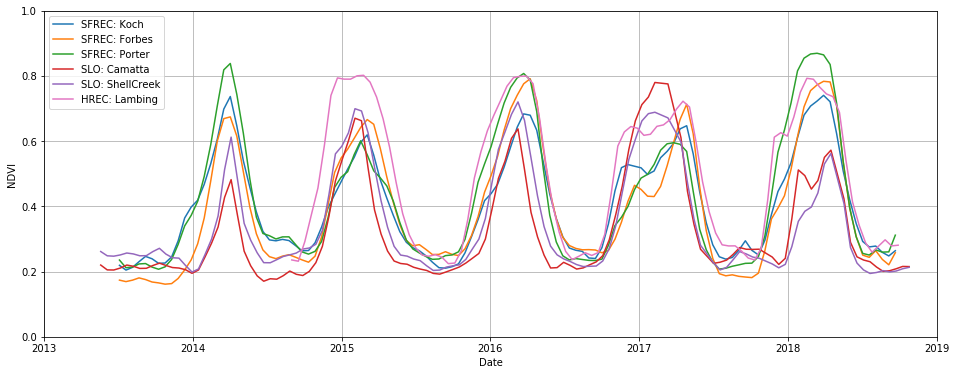

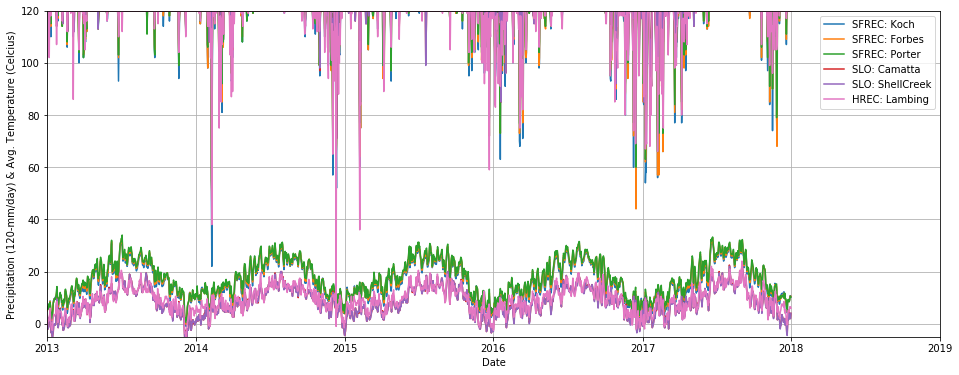

In [14]:
# Plot time series of NDVI and then weather variables among the five sites
figNum=0
sitecolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray', 'tab:olive', 'tab:cyan']

############
figNum+=1
plt.figure(figNum, figsize=(16,6))
for index, row in SiteTable.iterrows():
    Region = row['Region']
    SiteName = row['SiteName']
    sitecolor = sitecolors[index]
    
    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset)
    STARFMNANFilter = JoinedTableSubset['SSTARFM_NDVI'].notnull()
    JoinedTableSTARFMSubset = JoinedTableSubset.loc[STARFMNANFilter]
    # print(JoinedTableSTARFMSubset)      
    plt.plot(JoinedTableSTARFMSubset['Date'], JoinedTableSTARFMSubset['SSTARFM_NDVI'],'-', color = sitecolor, label=Region+": "+SiteName)
    
plt.ylim(0, 1)
plt.xlim(datetime.strptime('20130101','%Y%m%d'), datetime.strptime('20190101','%Y%m%d'))
plt.grid(True)
plt.legend()
plt.ylabel('NDVI')
plt.xlabel('Date')
plt.show()

############
figNum+=1
plt.figure(figNum, figsize=(16,6))
for index, row in SiteTable.iterrows():
    Region = row['Region']
    SiteName = row['SiteName']
    sitecolor = sitecolors[index]
    
    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset) 
    plt.plot(JoinedTableSubset['Date'], JoinedTableSubset['Tave'],'-', color = sitecolor, label=Region+": "+SiteName)
    plt.plot(JoinedTableSubset['Date'], 120-(JoinedTableSubset['Prcp']), color = sitecolor, label="")

plt.ylim(-5, 120)
plt.xlim(datetime.strptime('20130101','%Y%m%d'), datetime.strptime('20190101','%Y%m%d'))
plt.grid(True)
plt.legend()
plt.ylabel('Precipitation (120-mm/day) & Avg. Temperature (Celcius)')
plt.xlabel('Date')
plt.show()
#############

In [15]:
#Interactive Plotting
import plotly
import plotly.graph_objs as go
sitecolors = ['rgb(31,119,180)', 'rgb(255,127,14)', 'rgb(44,160,44)', 'rgb(214,39,40)', 'rgb(148,103,189)', 'rgb(227,119,194)', 'rgb(140,86,75)', 'rgb(127,127,127)', 'rgb(188,189,34)', 'rgb(23,190,207)']
plotly.offline.init_notebook_mode() # run at the start of every notebook
###################
data = []
for index, row in SiteTable.iterrows():
    Region = row['Region']
    SiteName = row['SiteName']
    sitecolor = sitecolors[index]
    
    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset)
    STARFMNANFilter = JoinedTableSubset['SSTARFM_NDVI'].notnull()
    JoinedTableSTARFMSubset = JoinedTableSubset.loc[STARFMNANFilter]
    # print(JoinedTableSTARFMSubset)      

    plotthis = go.Scatter(
        x=JoinedTableSTARFMSubset['Date'],
        y=JoinedTableSTARFMSubset['SSTARFM_NDVI'],
        mode = 'lines',
        line = dict(color = sitecolor),
        name = Region+"-"+SiteName,
    ) 
    data.append(plotthis)
layout = dict(
    autosize=False,
    width=1000,
    height=600,
    xaxis = dict(range = ['2013-01-01','2019-01-01']),
    yaxis=dict(title='STARFM NDVI'),
    legend=dict(orientation="h")
    )
fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

###################
data = []
for index, row in SiteTable.iterrows():
    Region = row['Region']
    SiteName = row['SiteName']
    sitecolor = sitecolors[index]
    
    Filter = JoinedTable['SiteName'].str.contains(SiteName) & JoinedTable['Region'].str.contains(Region)
    # print(Filter)
    JoinedTableSubset = JoinedTable.loc[Filter]
    # print(JoinedTableSubset)
    plotthis = go.Scatter(
        x=JoinedTableSubset['Date'],
        y=JoinedTableSubset['Tave'],
        mode = 'lines',
        line = dict(width=0.5, color = sitecolor),
        name = Region+"-"+SiteName+' (Temp)',
        fill='tozeroy'
    ) 
    data.append(plotthis)
    plotthis = go.Scatter(
        x=JoinedTableSubset['Date'],
        y=120-(JoinedTableSubset['Prcp']),
        mode = 'lines',
        line = dict(width=0.5, color = sitecolor),
        name = Region+"-"+SiteName+' (Prcp)',
    ) 
    data.append(plotthis)
layout = dict(
    autosize=False,
    width=1000,
    height=600,
    xaxis = dict(range = ['2013-01-01','2019-01-01']),
    yaxis=dict(title='Precipitation (120-mm/day) & Avg. Temperature (Celcius)'),
    legend=dict(orientation="h")
    )
fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

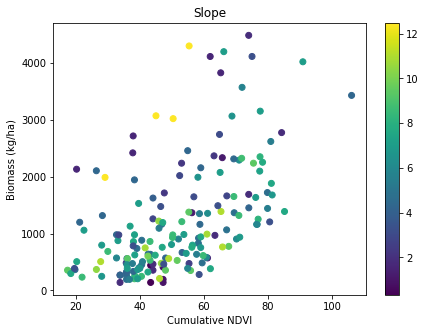

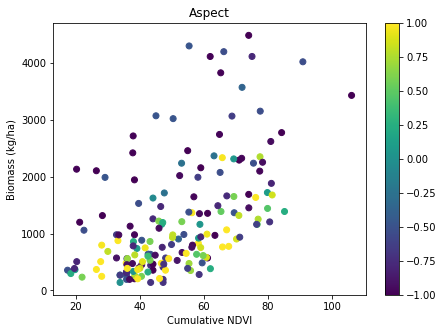

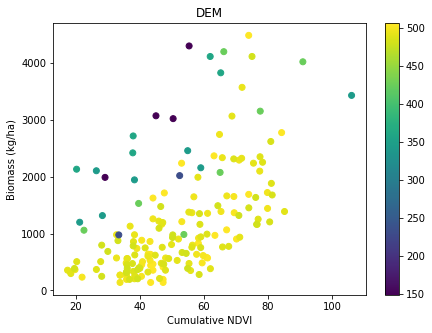

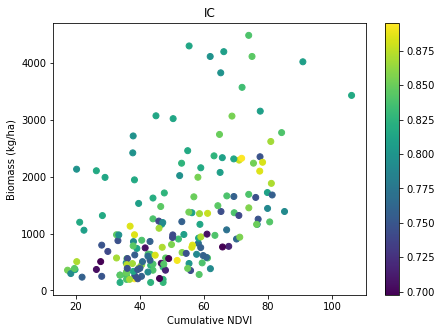

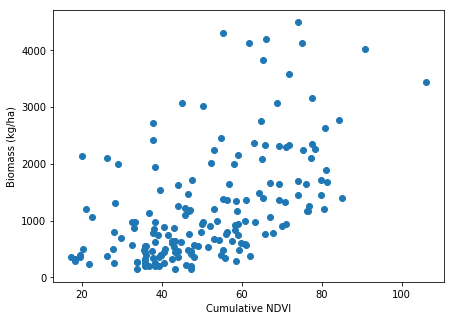

In [100]:
#reading in the cumulative NDVI and the climatic and topographic variables
Input_Data = pd.read_excel('C:\\Users\\GraceLiu\\Sta141b\\FinalProject\\input_data.xlsx',header = 0)
#convert Aspect to Cosine Aspect so that Aspect makes sense numerically
Input_Data['Aspect'] = np.cos(Input_Data['Aspect']/180*np.pi)
#plot Biomass - cumulative NDVI + (different topographic variables)
figNum = 0 
Topo_vars = ['Slope','Aspect','DEM','IC']
# plt.scatter(x = Input_Data['CumuNDVI'],y = Input_Data['Biomass'], c = Input_Data['Slope'])
# plt.show()  
for var in Topo_vars:  
    plt.figure(figNum, figsize=(7,5))   
    plt.scatter(x = Input_Data['CumuNDVI'],y = Input_Data['Biomass'], c = Input_Data[var])
    plt.ylabel('Biomass (kg/ha)')
    plt.xlabel('Cumulative NDVI')
    plt.title(var)
    plt.colorbar()
    plt.show()  
    figNum+=1
plt.figure(figNum, figsize=(7,5))   
plt.scatter(x = Input_Data['CumuNDVI'],y = Input_Data['Biomass'])
plt.ylabel('Biomass (kg/ha)')
plt.xlabel('Cumulative NDVI')
plt.show() 

In [78]:
#multilinear regression (Cumulative NDVI + Topography variables)
#fit1 Biomass~CumuNDVI
from statsmodels.api import OLS
Input_Data_fit1 = Input_Data.dropna(subset = ['Biomass','CumuNDVI'])
X = Input_Data_fit1[["CumuNDVI"]]
y = Input_Data_fit1[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     435.9
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           2.92e-49
Time:                        00:22:47   Log-Likelihood:                -1424.5
No. Observations:                 175   AIC:                             2851.
Df Residuals:                     174   BIC:                             2854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CumuNDVI      24.3188      1.165     20.878      0.0

In [82]:
# multilinear regression (Cumulative NDVI + Topography variables)
Input_Data_fit2 = Input_Data.dropna(subset = ['Biomass','CumuNDVI','Slope','DEM','Aspect','IC'])
X = Input_Data_fit2[["CumuNDVI","Slope","DEM","Aspect","IC"]]
y = Input_Data_fit2[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           6.39e-64
Time:                        00:27:34   Log-Likelihood:                -1378.1
No. Observations:                 175   AIC:                             2766.
Df Residuals:                     170   BIC:                             2782.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CumuNDVI      33.5009      2.868     11.681      0.0

In [83]:
# The above results indicates removing Aspect and Slope
X = Input_Data_fit2[["CumuNDVI","DEM","IC"]]
y = Input_Data_fit2[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     282.0
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           3.76e-66
Time:                        00:30:18   Log-Likelihood:                -1378.7
No. Observations:                 175   AIC:                             2763.
Df Residuals:                     172   BIC:                             2773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CumuNDVI      33.3968      2.853     11.704      0.0

In [84]:
# multilinear regression (Cumulative NDVI + Topography variables + Climatic variables)
Input_Data_fit3 = Input_Data.dropna()
X = Input_Data_fit3[["CumuNDVI","Slope","DEM","Aspect","IC","Apr_prcp","Mar_prcp","Winter_prcp","GS_prcp",
                     "Apr_tave","Mar_tave","Winter_tave","Nov2Apr_tcumu"]]
y = Input_Data_fit3[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     20.69
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.31e-23
Time:                        00:31:42   Log-Likelihood:                -1008.0
No. Observations:                 130   AIC:                             2042.
Df Residuals:                     117   BIC:                             2079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CumuNDVI         37.4530      3.301     11.346

In [85]:
# The above results indicates keeping CumuNDVI, Apr_prcp,GS_prcp,Mar_tave,Apr_tave, and Nov2Apr_tcumu
Input_Data_fit3 = Input_Data.dropna()
X = Input_Data_fit3[["CumuNDVI","Apr_prcp","GS_prcp","Apr_tave","Mar_tave","Nov2Apr_tcumu"]]
y = Input_Data_fit3[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.96e-48
Time:                        00:34:46   Log-Likelihood:                -1018.9
No. Observations:                 130   AIC:                             2050.
Df Residuals:                     124   BIC:                             2067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CumuNDVI         37.4918      3.441     10.895

In [86]:
# removing Apr_prcp
Input_Data_fit3 = Input_Data.dropna()
X = Input_Data_fit3[["CumuNDVI","GS_prcp","Apr_tave","Mar_tave","Nov2Apr_tcumu"]]
y = Input_Data_fit3[["Biomass"]]
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Biomass   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           2.05e-49
Time:                        00:35:34   Log-Likelihood:                -1019.2
No. Observations:                 130   AIC:                             2048.
Df Residuals:                     125   BIC:                             2063.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CumuNDVI         37.6485      3.428     10.982

In [97]:
# random forest
Input_Data_rf = Input_Data[["Biomass","CumuNDVI","Slope","DEM","Aspect","IC","Apr_prcp","Mar_prcp","Winter_prcp","GS_prcp",
                             "Apr_tave","Mar_tave","Winter_tave","Nov2Apr_tcumu"]]
Input_Data_rf = Input_Data_rf.dropna()
# prepare the data for random forest
labels = np.array(Input_Data_rf['Biomass'])
# Remove the labels from the features
features= Input_Data_rf.drop('Biomass', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Training Features Shape: (97, 13)
Training Labels Shape: (97,)
Testing Features Shape: (33, 13)
Testing Labels Shape: (33,)
Mean Absolute Error: 499.42 degrees.
Accuracy: 49.06 %.


In [96]:
# Visualizing a single decision tree
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')